Solucion utilizando descomposicion QR: [11.  1.]


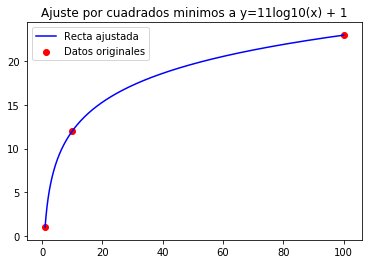

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# Ejercicio 1: Cuadrados minimos con QR

data_x = [1, 10, 100]
data_y = [1, 12, 23]

A = [ [0, 1], [1, 1], [2, 1]]
b = [ 1, 12, 23 ]

Q, R = np.linalg.qr(A, mode='reduced')
x_qr = np.linalg.solve(R, Q.T @ b)

print(f'Solucion utilizando descomposicion QR: {x_qr}')

time = np.linspace(1, 100, 10000)
adjust = [x_qr[0]*np.log10(t) + x_qr[1] for t in time]
plt.figure()
plt.plot(time, adjust, label='Recta ajustada', color='b')
plt.scatter(data_x, data_y, marker='o', color='r', label='Datos originales')
plt.title(f'Ajuste por cuadrados minimos a y={x_qr[0]:.0f}log10(x) + {x_qr[1]:.0f}')
plt.legend()
plt.show()

[ 0. -0.  0.]
[-7.96662342  7.96662342 -0.        ]
[ 0.91278505 -0.45639253  0.        ]
[-7.05383837  7.5102309   0.        ]


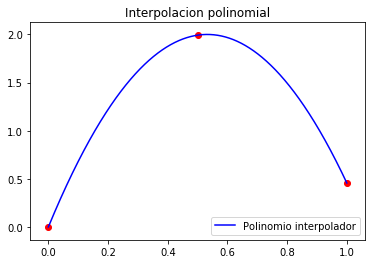

In [87]:
# Ejercicio 2: Interpolacion polinomial
# f(x) = 1 - cos(2pisin(x))
import numpy.polynomial.polynomial as poly

"""
    lagrange_interpolation: 
     Encuentra el polinomio interpolador de 'f' en [a, b] usando polinomios de lagrange de orden n
     Si 'cheby' es True se usan nodos de chebyshev, de lo contrario equiespaciados
     Devuelve [an,..., a1, a0] que es como np.polyval() recibe los coeficientes
"""
def lagrange_interpolation(a, b, n, f, cheby):
    if cheby:
        zj = [np.cos((2*j+1)/(2*(n+1))*np.pi) for j in range(n+1)]
        x_nodes = [(b+a)/2 + (b-a)/2*z for z in zj] 
    else:
        x_nodes = np.linspace(a, b, n + 1)
    y_nodes = [f(x) for x in x_nodes]
    # hay n+1 polinomios con n+1 coeficientes
    lag_pols = np.zeros((n + 1, n + 1)) 
    for k in range(len(x_nodes)):
        # Formamos el polinomio de lagrange k a partir de sus raices
        lag_roots = np.delete(x_nodes, k)
        lag_pols[k] = np.flip(poly.polyfromroots(lag_roots)) / np.prod(x_nodes[k] - lag_roots) * y_nodes[k]
        print(lag_pols[k])  # comentar si no se quieren ver los polinomios de Lagrange
    interp_poly = np.sum(lag_pols, axis=0)
    
    return (interp_poly, (x_nodes, y_nodes))
    
n = 2
a = 0
b = 1
pol, nodes = lagrange_interpolation(a, b, n, 
                             lambda x: 1 - np.cos(2*np.pi*np.sin(x)), False)
print(pol)

time = np.linspace(a, b, 1000)
plt.figure()
plt.plot(time, np.polyval(pol, time), label='Polinomio interpolador', color='b')
plt.scatter(nodes[0], nodes[1], marker='o', color='r')
plt.title(f'Interpolacion polinomial')
plt.legend()
plt.show()

In [94]:
import iterative

""" Resolucion por Newton Raphson """

def fun_newton(x):
    return x**2 - np.cos(x)

# f'(x) = 2x + sen(x)
def fprime_newton(x):
    return 2*x + np.sin(x)

a = 0.6
b = 1
prec = 1e-9
root_nr = iterative.newton_raphson(a, b, prec, fun_newton, fprime_newton)
print(f'Raiz por Newton: {root_nr}')

Raiz en iteracion 1: x1 = 0.8244704340303408
Raiz en iteracion 2: x2 = 0.8241323765632924
Raiz en iteracion 3: x3 = 0.8241323123025248
Raiz en iteracion 4: x4 = 0.8241323123025225
Raiz por Newton: 0.8241323123025225
